In [1]:
# improting libraries

import random
random.seed(1234)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

# Statiscal methods
from scipy import stats

# Sampling Methods
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Model Selectioin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Dimensionality Reduction
from sklearn.decomposition import PCA, TruncatedSVD


# Simple ML models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Performance metrics
import sklearn.metrics as skm

In [2]:
## Loading the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
## Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
## Target Variable Analysis
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


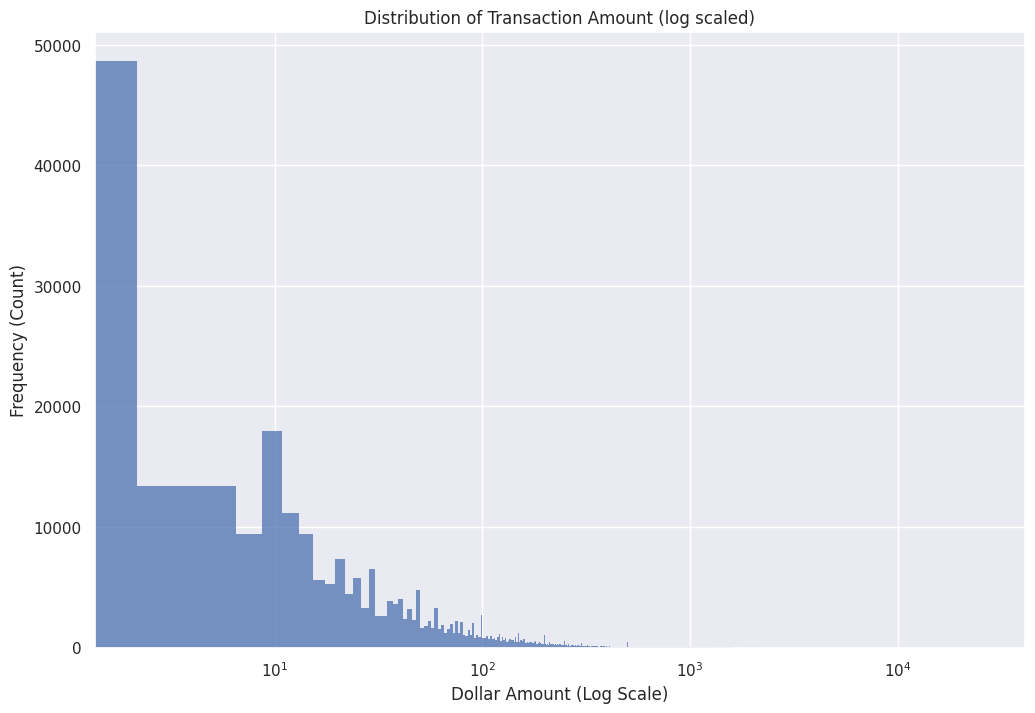

In [6]:
## Feature Variable Analysis

# Basic statistics
print(df['Amount'].describe())

# Distribution
sns.histplot(data=df, x='Amount').set(xscale="log")
plt.xlabel("Dollar Amount (Log Scale)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Transaction Amount (log scaled)")
plt.show()

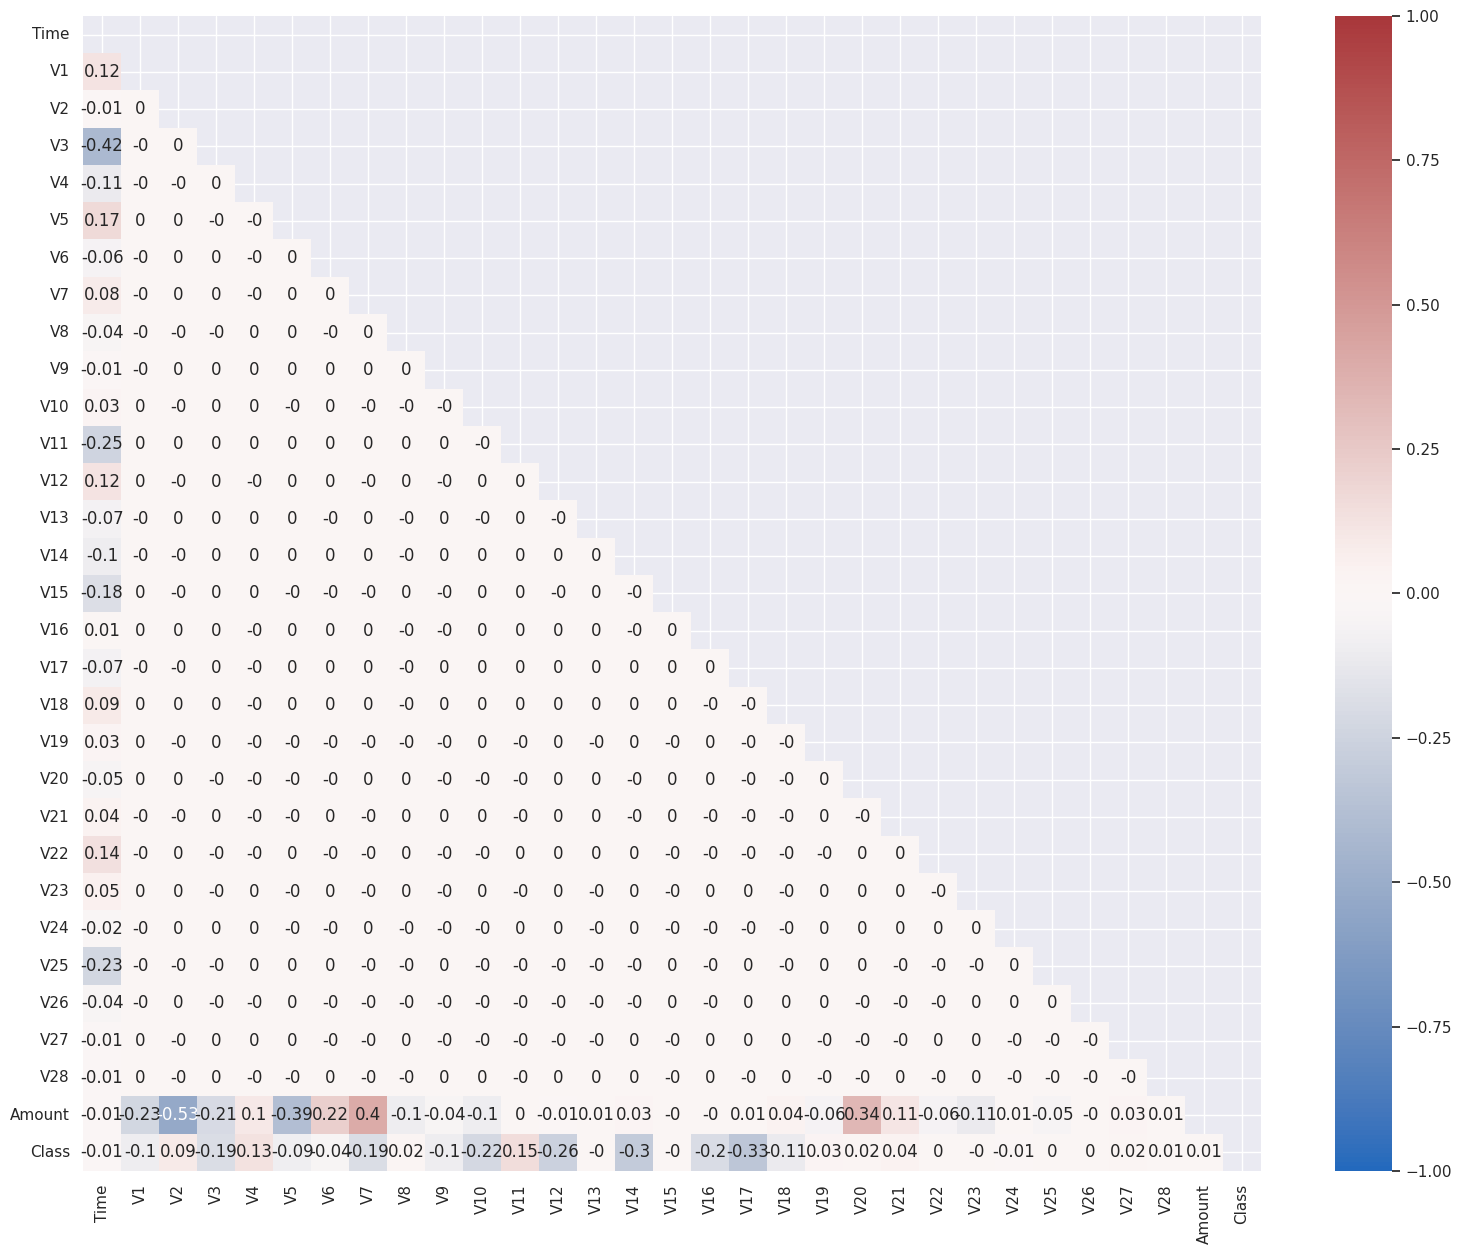

In [7]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='vlag', mask=mask)
plt.show()

In [8]:
# Filtering those with some signigicant correlation coefficients
matrix = df.corr()
matrix = abs(matrix).unstack()
matrix = matrix[matrix.between(0.5, 1, inclusive='neither')]

print(matrix)

V2      Amount    0.531409
Amount  V2        0.531409
dtype: float64


In [9]:
## Simple processing steps
def basic_processing(data, col_drop, col_rename):

  
    #Drop the 'Serial No.' column
    if len(col_drop) > 0:
        data.drop(col_drop, axis=1, inplace=True)

    # Renaming the target variable and one predictor
    if col_rename:
        data.rename(columns=col_rename, inplace=True)
    
    # Removing any Duplicate Observations if any
    data.drop_duplicates(keep='first', inplace=True)
    return data

In [10]:
df = basic_processing(df, col_drop = [], col_rename = {"Class": "target"})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Applying statistical imputation
def imputation_missing_val(data):
   
    
    # Filter the columns with missing values
    null_cols = data.columns[data.isna().any()].tolist()
    
    for col in null_cols:
        # Impute using median for numeric columns
        if data[col].dtype.kind in 'iufc':
            data[col] = data[col].transform(lambda x: x.fillna(x.median()))
            
        # Impute using median for non-numeric columns
        else:
            data[col] = data[col].transform(lambda x: x.fillna(x.mode()))
    
    return data

In [12]:
# Identify missing values and dealing with them if present
def identify_missing_val(data):
  
    # Count number of missing values 
    sum_nulls = data.isna().sum().sum()
    print("With %d null/na values in the dataset:" % sum_nulls)
    
    # Only visualize if missing values present
    if sum_nulls > 0: 
        print("- We need to resolve this issue.")
        plt.figure(figsize=(10,6))
        sns.heatmap(df.isna().transpose(),
                    cmap="YlGnBu",
                    cbar_kws={'label': 'Missing Data'})
        plt.xlabel("Features")
        plt.ylabel("Observations")
        plt.show()
        
        # Proceeding in imputing the dataset with missing values
        data = imputation_missing_val(data)
        sum_nulls = data.isna().sum().sum()
        print("After imputation, we have missing {:d} values in our data." % sum_nulls)
    else:
        print("- No action needed")
        pass
    return data

In [13]:
df = identify_missing_val(df)
df.head()

With 0 null/na values in the dataset:
- No action needed


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


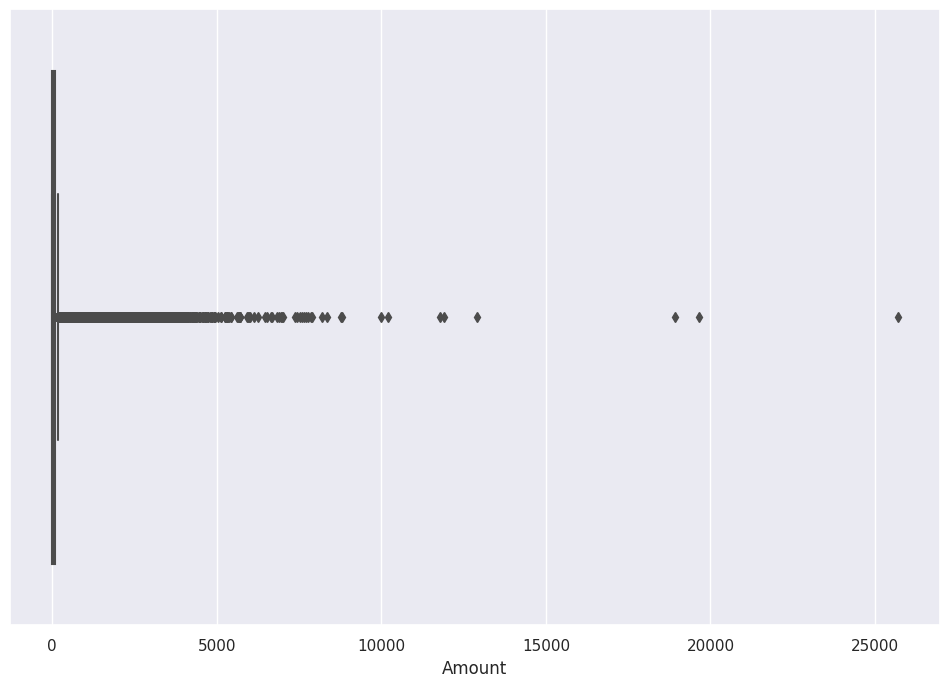

In [14]:
## Outliers
sns.boxplot(data=df, x='Amount')
plt.show()

In [15]:
# Detecting outliers using z-score
def outliers_detection(data, threshold=3):
    print("At ±", threshold, "standard deviation from the mean:")
    for col in data.columns[:-1]:
        # Calculating the z-score for each predictor
        var = data[col]
        z = np.abs(stats.zscore(var))

        # Outlier
        pos = list(np.where(z > threshold)[0])
        no_of_outliers = len(pos)
        if no_of_outliers > 0:
            print("\t- ", col, "variable contains", no_of_outliers,  "outliers")
            if no_of_outliers < 10:
                outliers = list(var[pos])
                print(outliers)
            else:
                continue

        else:
            print("\t- No outliers detected for the", col, "variable")

In [16]:
outliers_detection(df)

At ± 3 standard deviation from the mean:
	- No outliers detected for the Time variable
	-  V1 variable contains 3647 outliers
	-  V2 variable contains 4303 outliers
	-  V3 variable contains 1953 outliers
	-  V4 variable contains 3101 outliers
	-  V5 variable contains 2913 outliers
	-  V6 variable contains 4638 outliers
	-  V7 variable contains 3404 outliers
	-  V8 variable contains 4205 outliers
	-  V9 variable contains 2253 outliers
	-  V10 variable contains 3450 outliers
	-  V11 variable contains 661 outliers
	-  V12 variable contains 3446 outliers
	-  V13 variable contains 1189 outliers
	-  V14 variable contains 3378 outliers
	-  V15 variable contains 1252 outliers
	-  V16 variable contains 2085 outliers
	-  V17 variable contains 2520 outliers
	-  V18 variable contains 1669 outliers
	-  V19 variable contains 3395 outliers
	-  V20 variable contains 4594 outliers
	-  V21 variable contains 4096 outliers
	-  V22 variable contains 1212 outliers
	-  V23 variable contains 3356 outliers
	- 

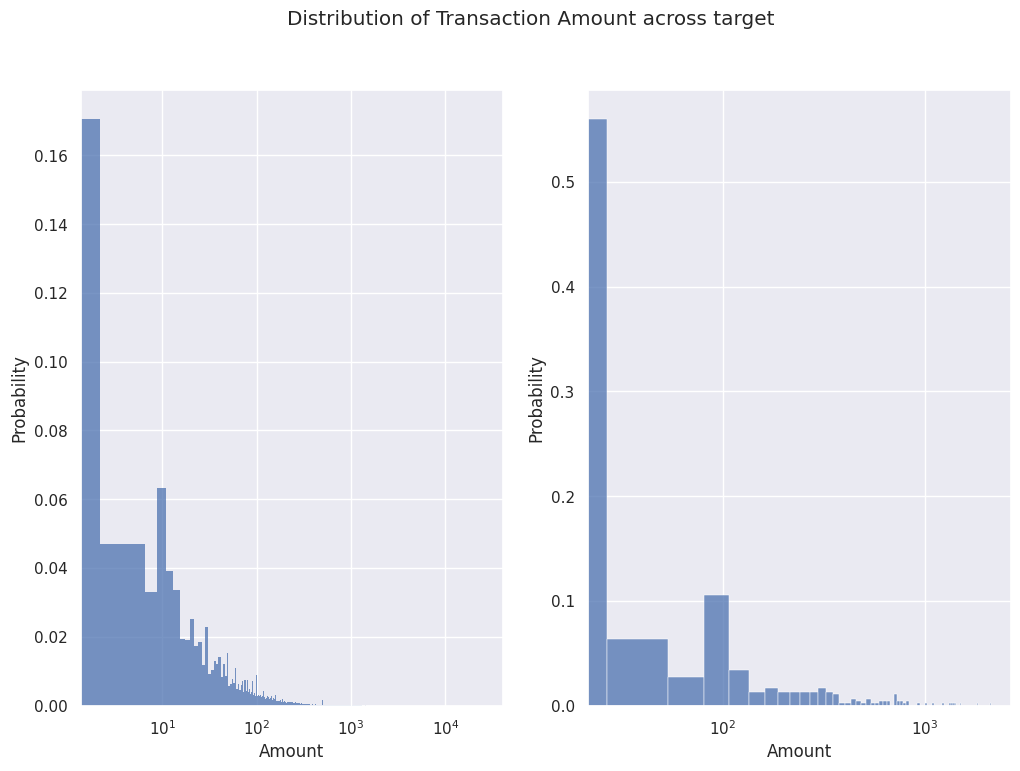

In [17]:
# Splitting data by fraud target
df_no_fraud = df[df['target'] == 0]
df_fraud = df[df['target'] == 1]

# Histogram for Amount Distribution per target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across target')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

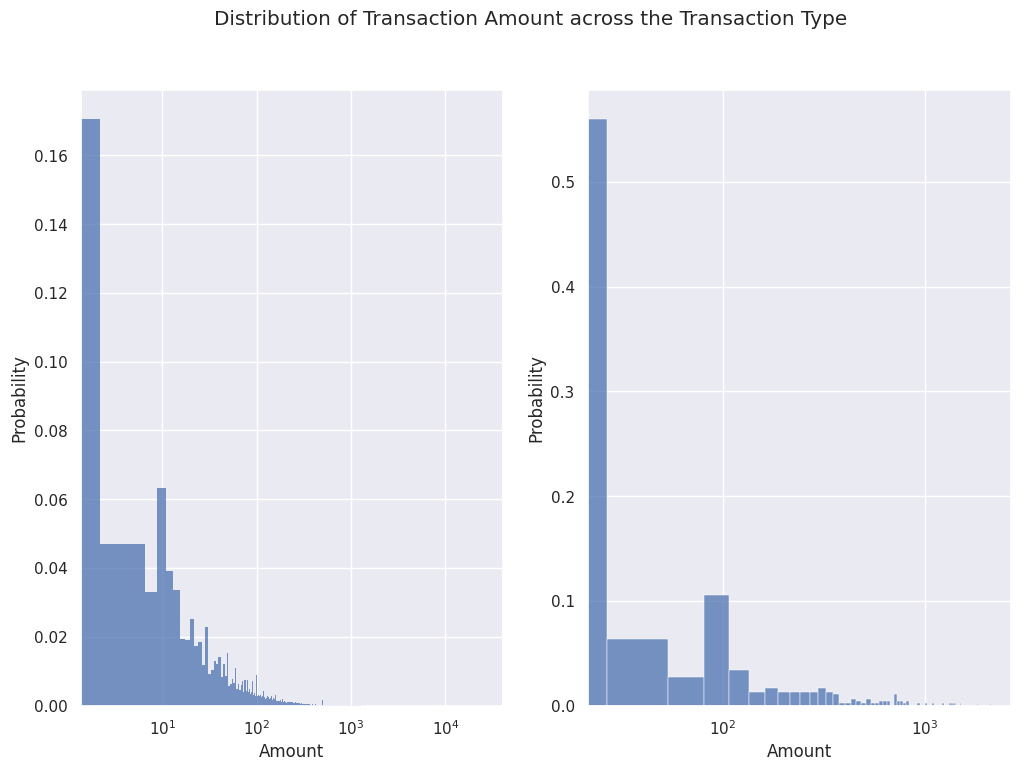

In [18]:
# Histogram for Amount Distribution per target after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across the Transaction Type')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

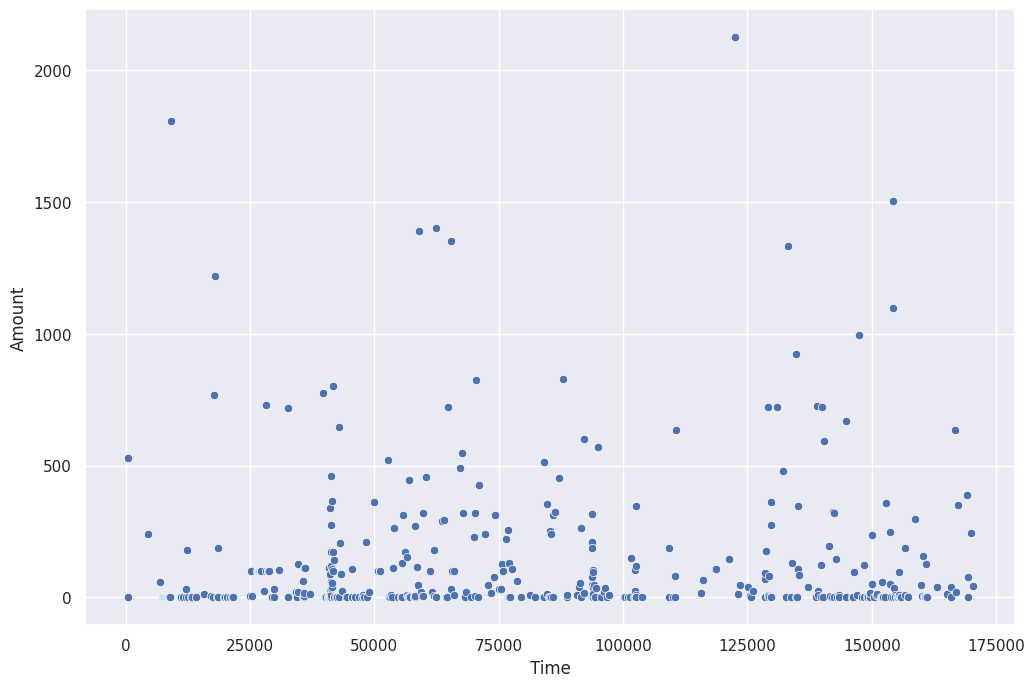

In [19]:
# Scatterplot
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.show()

In [20]:
def class_imbalance(data, sampling_methods={'SMOTE': SMOTE(), 'Near-Miss': NearMiss(),
                                            'over': RandomOverSampler(sampling_strategy=0.5),
                                            'under':RandomUnderSampler(sampling_strategy=0.8)}):
  
    # Splitting features & target variable
    X = df.drop(columns=['target'], axis=1)
    y = df['target']
    
    #Testing SMOTE() and Near-Miss() Algorithms
    sampling_alg = [sampling_methods['SMOTE'], sampling_methods['Near-Miss']]

    for alg in sampling_alg:
        X_new, y_new = alg.fit_resample(X, y)
        bal = y_new.value_counts(normalize=True) * 100
        
        print(f'''Shape of X before {alg}: {X.shape} Shape of X after {alg}: {X_new.shape}''')
        print(f'\nBalance of positive and negative classes (%): \n{bal}\n')
    
    ## Combined Sampling: Random Sampling Algorithms
    X_over, y_over = sampling_methods['over'].fit_resample(X, y)
    X_sampled, y_sampled = sampling_methods['under'].fit_resample(X_over, y_over)
    
    bal = y_sampled.value_counts(normalize=True) * 100
    print(f'''After combined sampling, shape of features: {X_sampled.shape}''')
    print(f'\nBalance of positive and negative classes (%): \n{bal}\n')
        
    return X_sampled, y_sampled

In [21]:
X, y = class_imbalance(df)

Shape of X before SMOTE(): (283726, 30) Shape of X after SMOTE(): (566506, 30)

Balance of positive and negative classes (%): 
target
0    50.0
1    50.0
Name: proportion, dtype: float64

Shape of X before NearMiss(): (283726, 30) Shape of X after NearMiss(): (946, 30)

Balance of positive and negative classes (%): 
target
0    50.0
1    50.0
Name: proportion, dtype: float64

After combined sampling, shape of features: (318658, 30)

Balance of positive and negative classes (%): 
target
0    55.555486
1    44.444514
Name: proportion, dtype: float64



In [23]:
def dimensionality_reduction(X, n=5,
                             dimred_methods={'PCA':PCA(),'SVD':TruncatedSVD()}):

    name, result = '', 0
    for method_name, method_func in dimred_methods.items():
        method_func.n_components = n
        method_func.fit_transform(X)
        exp_var = np.sum(method_func.explained_variance_ratio_)
        if exp_var > result:
            name = method_name 
            result = exp_var
        else:
            continue
    final = dimred_methods[name]
    final.n_components = n
    
    return final.fit_transform(X)

In [24]:
X_red = dimensionality_reduction(X)

In [25]:
def model_comparison(X, y, models):
    """ Function to split data into training and testing set
    
    Parameters
    ----------
    data : dataframe
        A dataset
    models: A dictionary
        A pre-defined dictionary with each model name and applicable function
    
    optional train_test params
    
    Returns
    -------
    models_df
        A dataframe with each model performance
    """
    # Obtain training and testing sets from function above
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Craete dictionary to save performance data 
    models_perf = {'Models': [], 'CV_mean': [], 'CV_std': []}
    
    # Obtain model performance across K-Fold using Cross-Validation 
    for model in models:
        cv_results = cross_validate(model, X_train, y_train, 
                                    cv=3, scoring='average_precision')
        n_scores = abs(cv_results['test_score'])
        models_perf['Models'].append(str(model))
        models_perf['CV_mean'].append(np.mean(n_scores))
        models_perf['CV_std'].append(np.std(n_scores))
    
    models_df = pd.DataFrame(models_perf, columns = ['Models', 'CV_mean', 'CV_std'])
    return models_df

In [26]:
# List of simple ML models
models_simple = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), 
                 SGDClassifier(), DecisionTreeClassifier()]

# Model Comparison
model_comparison(X_red, y, models_simple)

,Models,CV_mean,CV_std
0,LogisticRegression(max_iter=1000),0.982877,0.001295
1,KNeighborsClassifier(),0.997157,0.000061
2,SGDClassifier(),0.835473,0.124872
3,DecisionTreeClassifier(),0.998647,0.000287


In [27]:
# Data split & Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X_red, y)
final_clf = RandomForestClassifier()
final_clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Predicitions & Model Performance
y_pred = final_clf.predict(X_test)
auprc = skm.average_precision_score(y_test, y_pred)
# report performance
print('Final Model {} - AUPRC: {:.5f}' .format(final_clf, auprc))

Final Model RandomForestClassifier() - AUPRC: 0.99977
